In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [3]:
pip install tensorflow-text

     |████████████████████████████████| 4.3 MB 3.4 MB/s 
     |████████████████████████████████| 454.4 MB 7.5 kB/s 
     |████████████████████████████████| 1.2 MB 35.6 MB/s 
     |████████████████████████████████| 4.0 MB 35.1 MB/s 
     |████████████████████████████████| 5.6 MB 31.8 MB/s 
     |████████████████████████████████| 462 kB 34.4 MB/s 
     |████████████████████████████████| 4.0 MB 35.9 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Attempting uninstall: h5py
    Found existing installatio

In [4]:
import re
import string
import numpy as np 
import random
import pandas as pd 

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

from collections import defaultdict
from collections import Counter

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text 


from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,accuracy_score

In [5]:
train = pd.read_csv('../input/nlp-getting-started/train.csv')
test  = pd.read_csv('../input/nlp-getting-started/test.csv')

In [6]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


<AxesSubplot:>

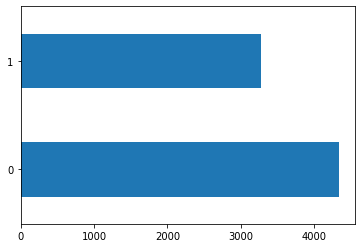

In [7]:
train['target'].value_counts().plot(kind='barh')

In [8]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
nlp = spacy.load('en_core_web_sm')
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [10]:
train['text'] = train['text'].apply(lambda row: preprocess(row))
test['text'] = test['text'].apply(lambda row: preprocess(row))

In [11]:
input_value = train.text

In [12]:
y = train.target
X = train.text

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [15]:
pipe = Pipeline([('bow', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [16]:
pipe.fit(X_train, y_train)
yp_class = pipe.predict(X_test)
print(accuracy_score(y_test, yp_class))

0.7935924369747899


In [17]:
submission = pd.DataFrame({'id': test.id, 'target': pipe.predict(test.text)})
submission.to_csv('submission.csv', index=False)